In [135]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy
from matplotlib.patches import Rectangle

In [136]:
# 1. Gaze Data import and computation of X and Y gaze coordinates

In [137]:
#Read gaze data as using pandas library
gazeData = pd.read_csv("gazeData.csv", skiprows=1)
# set display.max_columns to none, to show all the columns when using gazeData.head() to preview the gazeData
pd.set_option('display.max_columns', None)

In [138]:
# preview gaze data
gazeData.head()

Row  Timestamp  EventSource  SlideEvent   StimType  Duration  \
0    1   122.0544          1.0  StartSlide  TestImage  900000.0   
1    2   128.9448          NaN         NaN        NaN       NaN   
2    3   132.9790          1.0  StartMedia  TestImage  900000.0   
3    4   137.2724          NaN         NaN        NaN       NaN   
4    5   145.6203          NaN         NaN        NaN       NaN   

  CollectionPhase SourceStimuliName  EventSource.1  ET_GazeLeftx  \
0  StimuliDisplay               img            NaN           NaN   
1             NaN               img            1.0         951.0   
2  StimuliDisplay               img            NaN           NaN   
3             NaN               img            1.0         938.0   
4             NaN               img            1.0         938.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1         486.0          970.0          503.0     -1.000000           -1.0   
2           NaN            NaN            NaN           NaN            NaN   
3         500.0          966.0          519.0     -1.000000           -1.0   
4         500.0           -1.0           -1.0      2.614349           -1.0   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1        141.658       566.252441        569.685181        0.598863   
2            NaN              NaN               NaN             NaN   
3        149.984       566.216125        569.593445        0.599070   
4        158.333       566.265381         -1.000000        0.599004   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1        0.525673         0.429841         0.519144              0.0   
2             NaN              NaN              NaN              NaN   
3        0.525453         0.429996         0.518994              0.0   
4        0.525297        -1.000000        -1.000000              0.0   

   ET_ValidityRight  
0               NaN  
1               0.0  
2               NaN  
3               0.0  
4               4.0

In [139]:
# compute X and Y gaze positions
gazeData["GazeX"] = gazeData[["ET_GazeLeftx","ET_GazeRightx"]].mean(axis=1)
gazeData["GazeY"] = gazeData[["ET_GazeLefty","ET_GazeRighty"]].mean(axis=1)

In [140]:
# preview gaze data with new X and Y gaze positions columns
gazeData.head()

Row  Timestamp  EventSource  SlideEvent   StimType  Duration  \
0    1   122.0544          1.0  StartSlide  TestImage  900000.0   
1    2   128.9448          NaN         NaN        NaN       NaN   
2    3   132.9790          1.0  StartMedia  TestImage  900000.0   
3    4   137.2724          NaN         NaN        NaN       NaN   
4    5   145.6203          NaN         NaN        NaN       NaN   

  CollectionPhase SourceStimuliName  EventSource.1  ET_GazeLeftx  \
0  StimuliDisplay               img            NaN           NaN   
1             NaN               img            1.0         951.0   
2  StimuliDisplay               img            NaN           NaN   
3             NaN               img            1.0         938.0   
4             NaN               img            1.0         938.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1         486.0          970.0          503.0     -1.000000           -1.0   
2           NaN            NaN            NaN           NaN            NaN   
3         500.0          966.0          519.0     -1.000000           -1.0   
4         500.0           -1.0           -1.0      2.614349           -1.0   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1        141.658       566.252441        569.685181        0.598863   
2            NaN              NaN               NaN             NaN   
3        149.984       566.216125        569.593445        0.599070   
4        158.333       566.265381         -1.000000        0.599004   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1        0.525673         0.429841         0.519144              0.0   
2             NaN              NaN              NaN              NaN   
3        0.525453         0.429996         0.518994              0.0   
4        0.525297        -1.000000        -1.000000              0.0   

   ET_ValidityRight  Gaze_X  Gaze_Y  
0               NaN     NaN     NaN  
1               0.0   960.5   494.5  
2               NaN     NaN     NaN  
3               0.0   952.0   509.5  
4               4.0   468.5   249.5

In [141]:
# 2. Plot gaze data and AOIs; Assign gaze points to AOIs

In [142]:
# Read file with AOI coordinates
aois = pd.read_csv("aois_definition.csv")

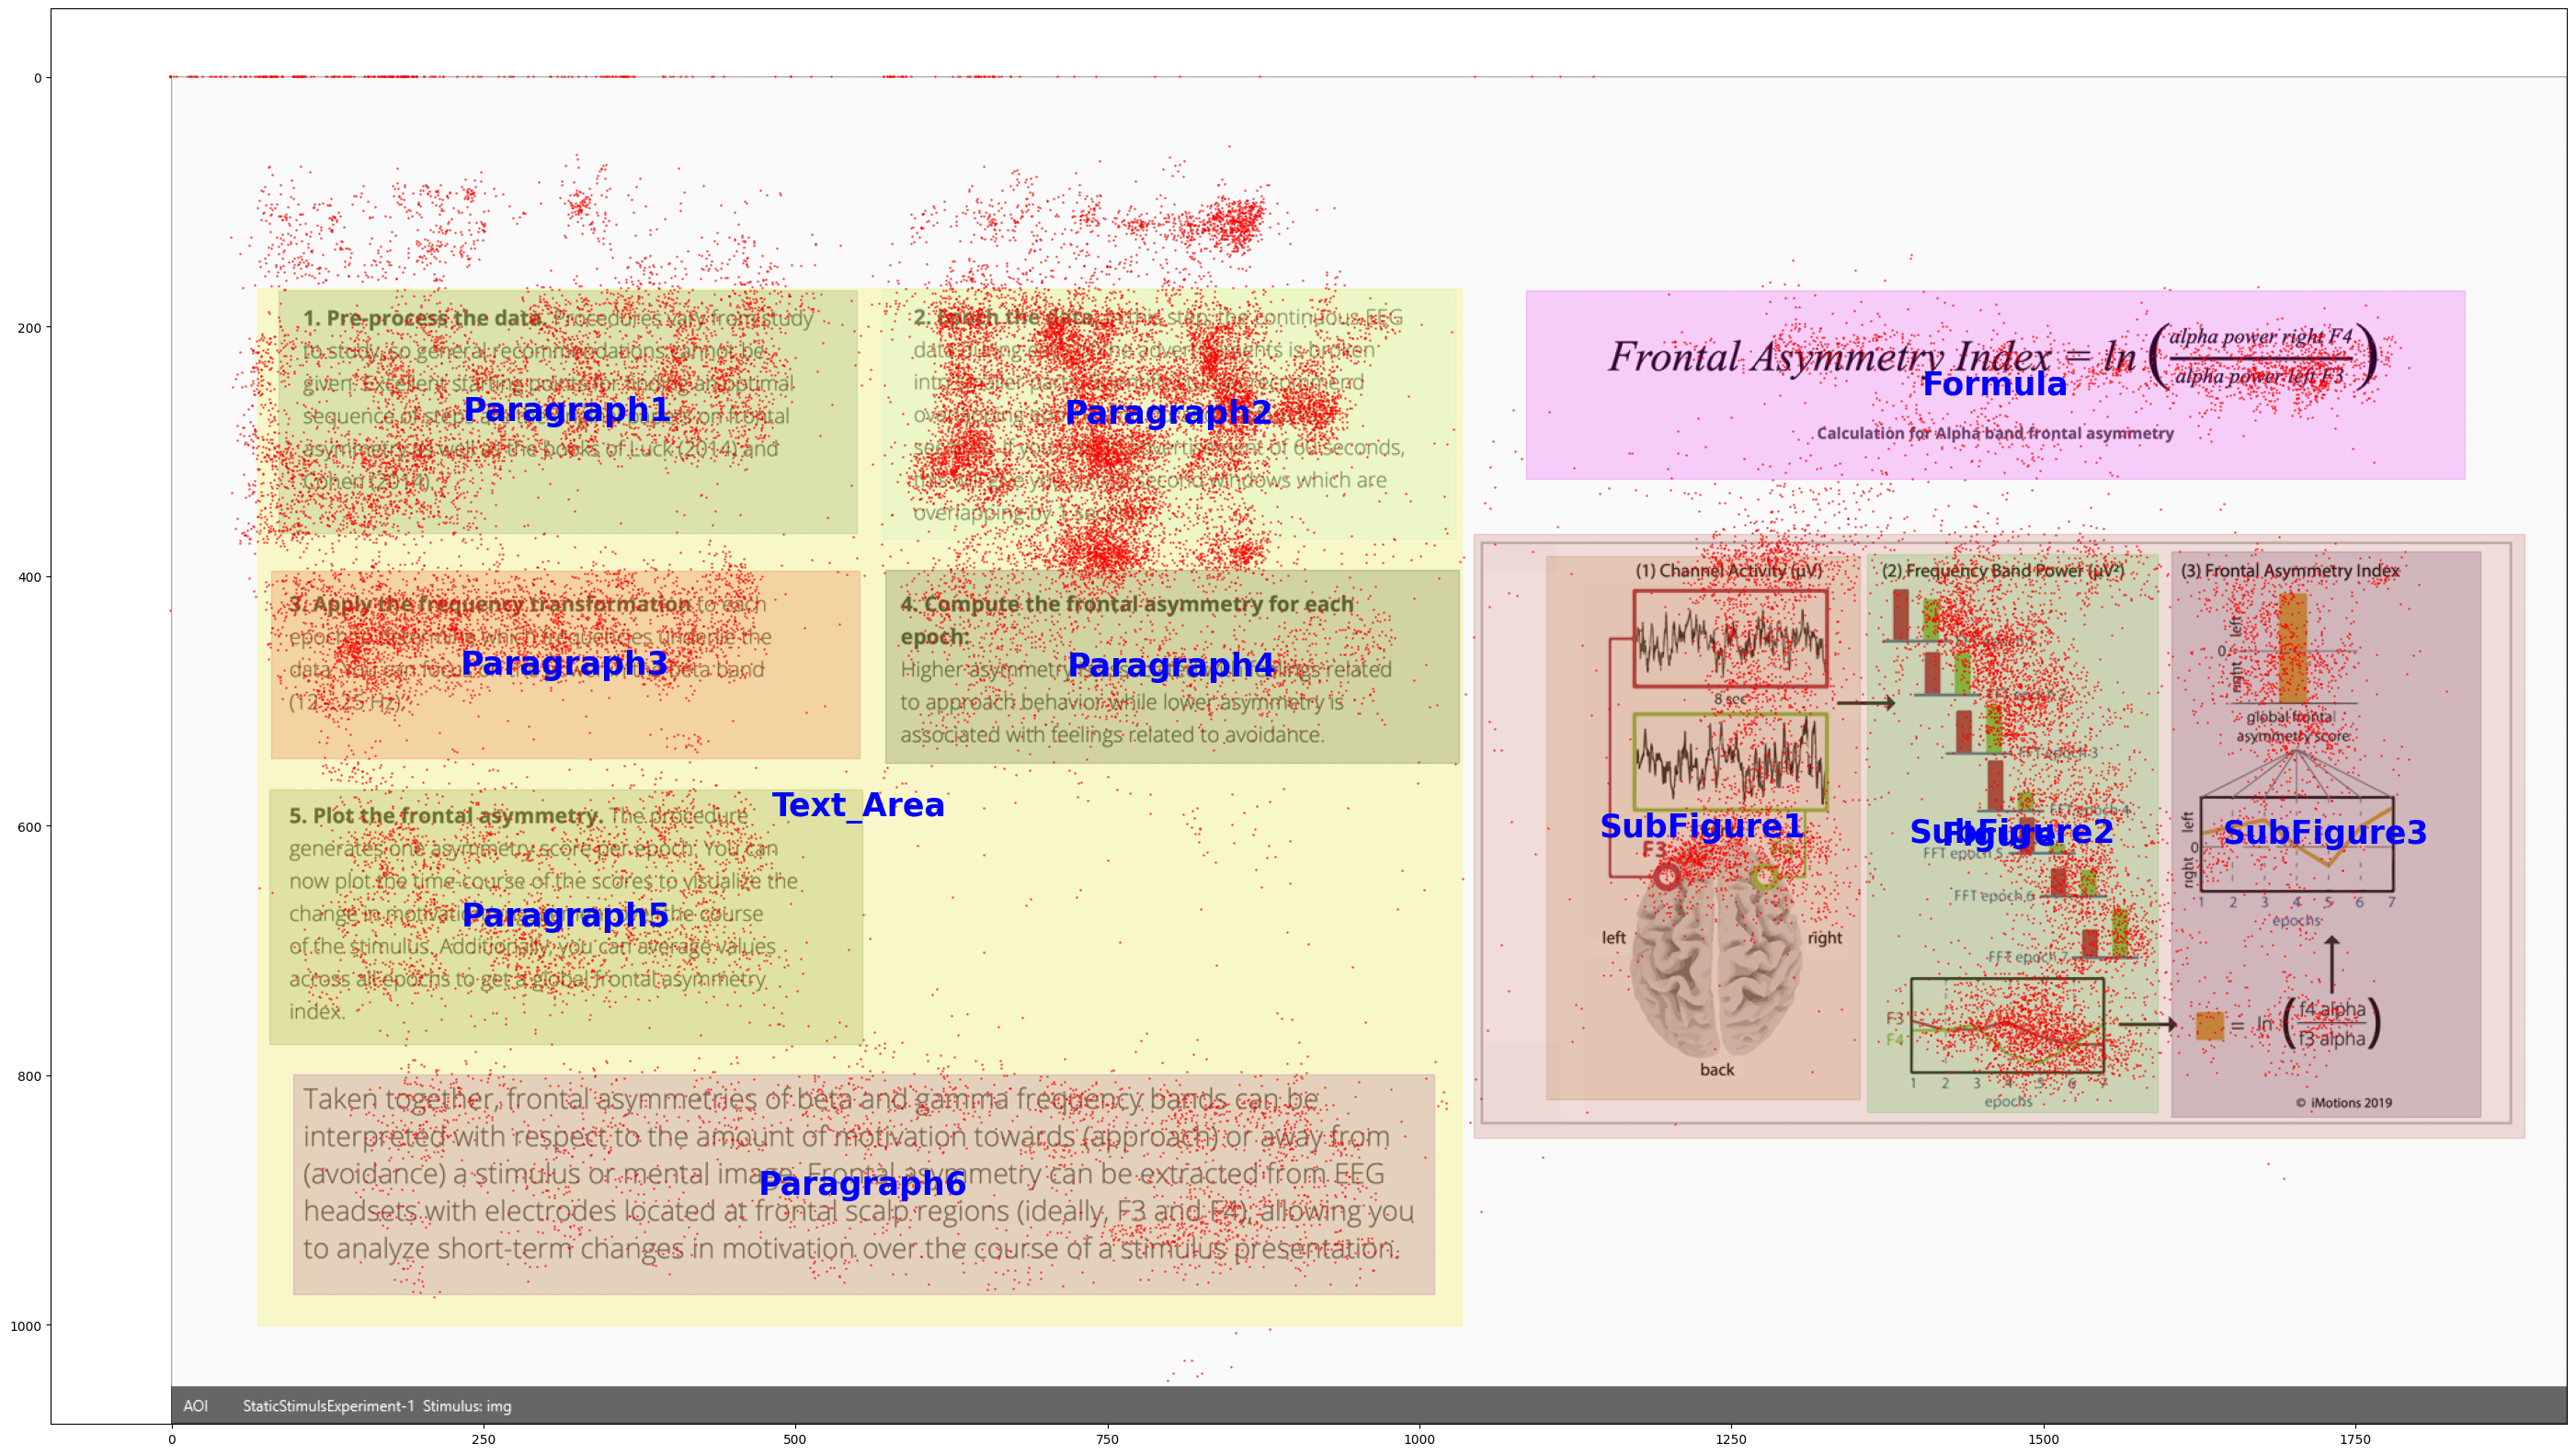

In [143]:
# Plot gazes and AOIs

# set plot dimensions
plt.rcParams['figure.figsize'] = [40, 20]
# initiate plot
fig, ax = plt.subplots()
#invert axses
ax.invert_yaxis()
# plot stimulus as background
img = plt.imread("stimulus.png")
ax.imshow(img)
# plot gazes
ax.plot(gazeData["GazeX"], gazeData["GazeY"],'o',alpha=0.5, markersize=1, color='red')
# generate a list of random colors
number_of_colors = 12
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# plot AOIs
# iterate over the rows in aois gazeDataframe
for index, row in aois.iterrows():
    # plot AOI as a rectangle
    ax.add_patch(Rectangle((row["xStart"], row["yStart"]), row["width"], row["height"],color=colors[index],alpha=0.2))
    # add text with AOI name     
    ax.annotate(row["AOI"], (row["xStart"]+row["width"]/2, row["yStart"]+row["height"]/2), color='blue', weight='bold', fontsize=25, ha='center', va='center')

In [144]:
# Assign gaze points to AOIs

def pointInRect(px,py,x1,y1,w,h):
    """ Method Description: check if a point is within a rectrangle
        Method Arguments: 
                px: point x cooridinate value
                py: point y cooridinate value
                x1: retangle starting point in x coordinate 
                y1: retangle starting point om y coordinate 
                w: retangle width
                h: rectangle height
         Method Return: 0 or 1 (0: gaze point is not in AOI, 1: gaze point is within AOI)"""

    x2 = x1+w
    y2 = y1+h
    return 1 if px >= x1 and px <= x2 and py >= y1 and py <= y2 else 0; 


# plot AOIs
# iterate over the rows in aois gazeDataframe
for index, row in aois.iterrows():
    # get the name of AOI
    aoiName = row["AOI"]
    # add a new column with key=aoiName and value=(0 or 1) depending on the pointInRect return value. 
    gazeData[aoiName] = gazeData.apply(lambda x : pointInRect(x["Gaze_X"],x["Gaze_Y"],row["xStart"],row["yStart"],row["width"],row["height"]),axis=1)

In [145]:
# preview gaze data with AOIs mapping
gazeData.head()

Row  Timestamp  EventSource  SlideEvent   StimType  Duration  \
0    1   122.0544          1.0  StartSlide  TestImage  900000.0   
1    2   128.9448          NaN         NaN        NaN       NaN   
2    3   132.9790          1.0  StartMedia  TestImage  900000.0   
3    4   137.2724          NaN         NaN        NaN       NaN   
4    5   145.6203          NaN         NaN        NaN       NaN   

  CollectionPhase SourceStimuliName  EventSource.1  ET_GazeLeftx  \
0  StimuliDisplay               img            NaN           NaN   
1             NaN               img            1.0         951.0   
2  StimuliDisplay               img            NaN           NaN   
3             NaN               img            1.0         938.0   
4             NaN               img            1.0         938.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1         486.0          970.0          503.0     -1.000000           -1.0   
2           NaN            NaN            NaN           NaN            NaN   
3         500.0          966.0          519.0     -1.000000           -1.0   
4         500.0           -1.0           -1.0      2.614349           -1.0   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1        141.658       566.252441        569.685181        0.598863   
2            NaN              NaN               NaN             NaN   
3        149.984       566.216125        569.593445        0.599070   
4        158.333       566.265381         -1.000000        0.599004   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1        0.525673         0.429841         0.519144              0.0   
2             NaN              NaN              NaN              NaN   
3        0.525453         0.429996         0.518994              0.0   
4        0.525297        -1.000000        -1.000000              0.0   

   ET_ValidityRight  Gaze_X  Gaze_Y  Paragraph1  Paragraph2  Paragraph3  \
0               NaN     NaN     NaN           0           0           0   
1               0.0   960.5   494.5           0           0           0   
2               NaN     NaN     NaN           0           0           0   
3               0.0   952.0   509.5           0           0           0   
4               4.0   468.5   249.5           1           0           0   

   Paragraph4  Paragraph5  Paragraph6  Text_Area  SubFigure1  SubFigure2  \
0           0           0           0          0           0           0   
1           1           0           0          1           0           0   
2           0           0           0          0           0           0   
3           1           0           0          1           0           0   
4           0           0           0          1           0           0   

   SubFigure3  Figure  Formula  
0           0       0        0  
1           0       0        0  
2           0       0        0  
3           0       0        0  
4           0       0        0

In [146]:
#3. Event detection

In [147]:
#Keep only the gaze data coming from the eye-tracking device
gazeData = gazeData[ gazeData['EventSource.1'] == 1 ]
#Fill n/a values
gazeData = gazeData.fillna('')

In [148]:
#Event detection configuration
config = {
                "fixationFilter" : "IVT",
                "screenResolutionWidth" : 1920, 
                "screenResolutionHeight" : 1080, 
                "monitorSize" : 17, 
                "screenDistance" : 70,
                "gapFill" : False, 
                "maxGapLength": 75, 
                "noiseReduction" : True, 
                "filterType" : "Median", 
                "windowNoise" : 3,
                "windowVelocity" : 20, 
                "velocityThreshold" : 30, 
                "mergeFixation" : True, 
                "maxTimeBtwFixation" : 75,
                "maxAngleBtwFixation" : 0.5, 
                "discardShortFixation" : True,
                "minDurationFixation" : 60
}


In [149]:
# POST gazeData to the (R) eventDetection server
# url = 'http://rserver:6789/eventDetection'
url = 'http://127.0.0.1:6789/eventDetection'
payload = {'config': config, 'data': gazeData.to_dict(orient="records")}
response = requests.post(url, json = payload)

In [150]:
# Create new a dataframe from the json response of the (R) eventDetection server
gazeDataWithEvents = pd.DataFrame.from_records(response.json())

In [151]:
# Preview gaze data with event information
gazeDataWithEvents.head()

Row  Timestamp EventSource SlideEvent StimType Duration CollectionPhase  \
0    2   128.9448                                                            
1    4   137.2724                                                            
2    5   145.6203                                                            
3    6   153.9470                                                            
4    7   162.2703                                                            

  SourceStimuliName  EventSource.1  ET_TimeSignal  ET_CameraLeftX  \
0               img              1        141.658          0.5989   
1               img              1        149.984          0.5991   
2               img              1        158.333          0.5990   
3               img              1        166.660          0.5989   
4               img              1        174.983          0.5991   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0          0.5257           0.4298           0.5191                0   
1          0.5255           0.4300           0.5190                0   
2          0.5253              NaN              NaN                0   
3          0.5252           0.4299           0.5187                0   
4          0.5251           0.4301           0.5187                0   

   ET_ValidityRight  Gaze_X  Gaze_Y  Paragraph1  Paragraph2  Paragraph3  \
0                 0   960.5   494.5           0           0           0   
1                 0   952.0   509.5           0           0           0   
2                 4   468.5   249.5           1           0           0   
3                 0   948.0   499.0           0           0           0   
4                 0   969.5   515.0           0           0           0   

   Paragraph4  Paragraph5  Paragraph6  Text_Area  SubFigure1  SubFigure2  \
0           1           0           0          1           0           0   
1           1           0           0          1           0           0   
2           0           0           0          1           0           0   
3           1           0           0          1           0           0   
4           1           0           0          1           0           0   

   SubFigure3  Figure  Formula  GazeX  GazeY  InterpolatedGazeX  \
0           0       0        0  960.5  494.5              960.5   
1           0       0        0  952.0  509.5              952.0   
2           0       0        0  938.0  500.0              948.0   
3           0       0        0  948.0  499.0              948.0   
4           0       0        0  969.5  515.0              969.5   

   InterpolatedGazeY  InterpolatedDistance  GazeVelocityAngle  FixID  \
0              494.5              567.9688                NaN    NaN   
1              500.0              567.9048            16.1935    1.0   
2              500.0              566.2654             4.7572    1.0   
3              500.0              567.7859            27.6866    1.0   
4              509.0              567.7856            27.6456    1.0   

  Fixation Index by Stimulus  Fixation X  Fixation Y  Fixation Start  \
0                        NaN         NaN         NaN             NaN   
1                               952.8727    495.6481        133.1086   
2                               952.8727    495.6481        133.1086   
3                               952.8727    495.6481        133.1086   
4                               952.8727    495.6481        133.1086   

   Fixation End  Fixation Duration  Fixation Dispersion  ET_PupilLeft  \
0           NaN                NaN                  NaN           NaN   
1       358.082           224.9734               0.2948           NaN   
2       358.082           224.9734               0.2948        2.6143   
3       358.082           224.9734               0.2948           NaN   
4       358.082           224.9734               0.2948           NaN   

   GazeAccelerationAngle  ET_PupilRight  SacID Saccade Index by Stimul

In [152]:
# export gazeDataWithEvents with events as csv
# gazegazeDataWithEvents.to_csv("gazeDataWithEvents.csv")

In [ ]:
# Fixation log

In [196]:
# Generate a dataframe with fixation data only
fixationData = gazeDataWithEvents[['FixID', 'Fixation Index by Stimulus',
       'Fixation X', 'Fixation Y', 'Fixation Start', 'Fixation End',
       'Fixation Duration', 'Fixation Dispersion']]
fixationData = fixationData.drop_duplicates()
fixationData = fixationData.dropna(subset=['FixID'])
# convert Fixation X and Fixation Y to int
fixationData['Fixation X'] = fixationData['Fixation X'].values.astype(int)
fixationData['Fixation Y'] = fixationData['Fixation Y'].values.astype(int)

# reset the index of the dataframe
fixationData = fixationData.reset_index()

In [197]:
# Preview fixtion data with event information
fixationData.head()

index  FixID Fixation Index by Stimulus  Fixation X  Fixation Y  \
0      1    1.0                                    952         495   
1     53    2.0                                    460         170   
2     79    3.0                                    214         166   
3     94    4.0                                    210         198   
4    127    5.0                                    289         190   

   Fixation Start  Fixation End  Fixation Duration  Fixation Dispersion  
0        133.1086      358.0820           224.9734               0.2948  
1        566.4076      708.1011           141.6935               0.1180  
2        783.0360      891.3651           108.3291               0.1850  
3        908.0385     1141.3419           233.3034               0.2571  
4       1182.9961     1349.6581           166.6620               0.1125

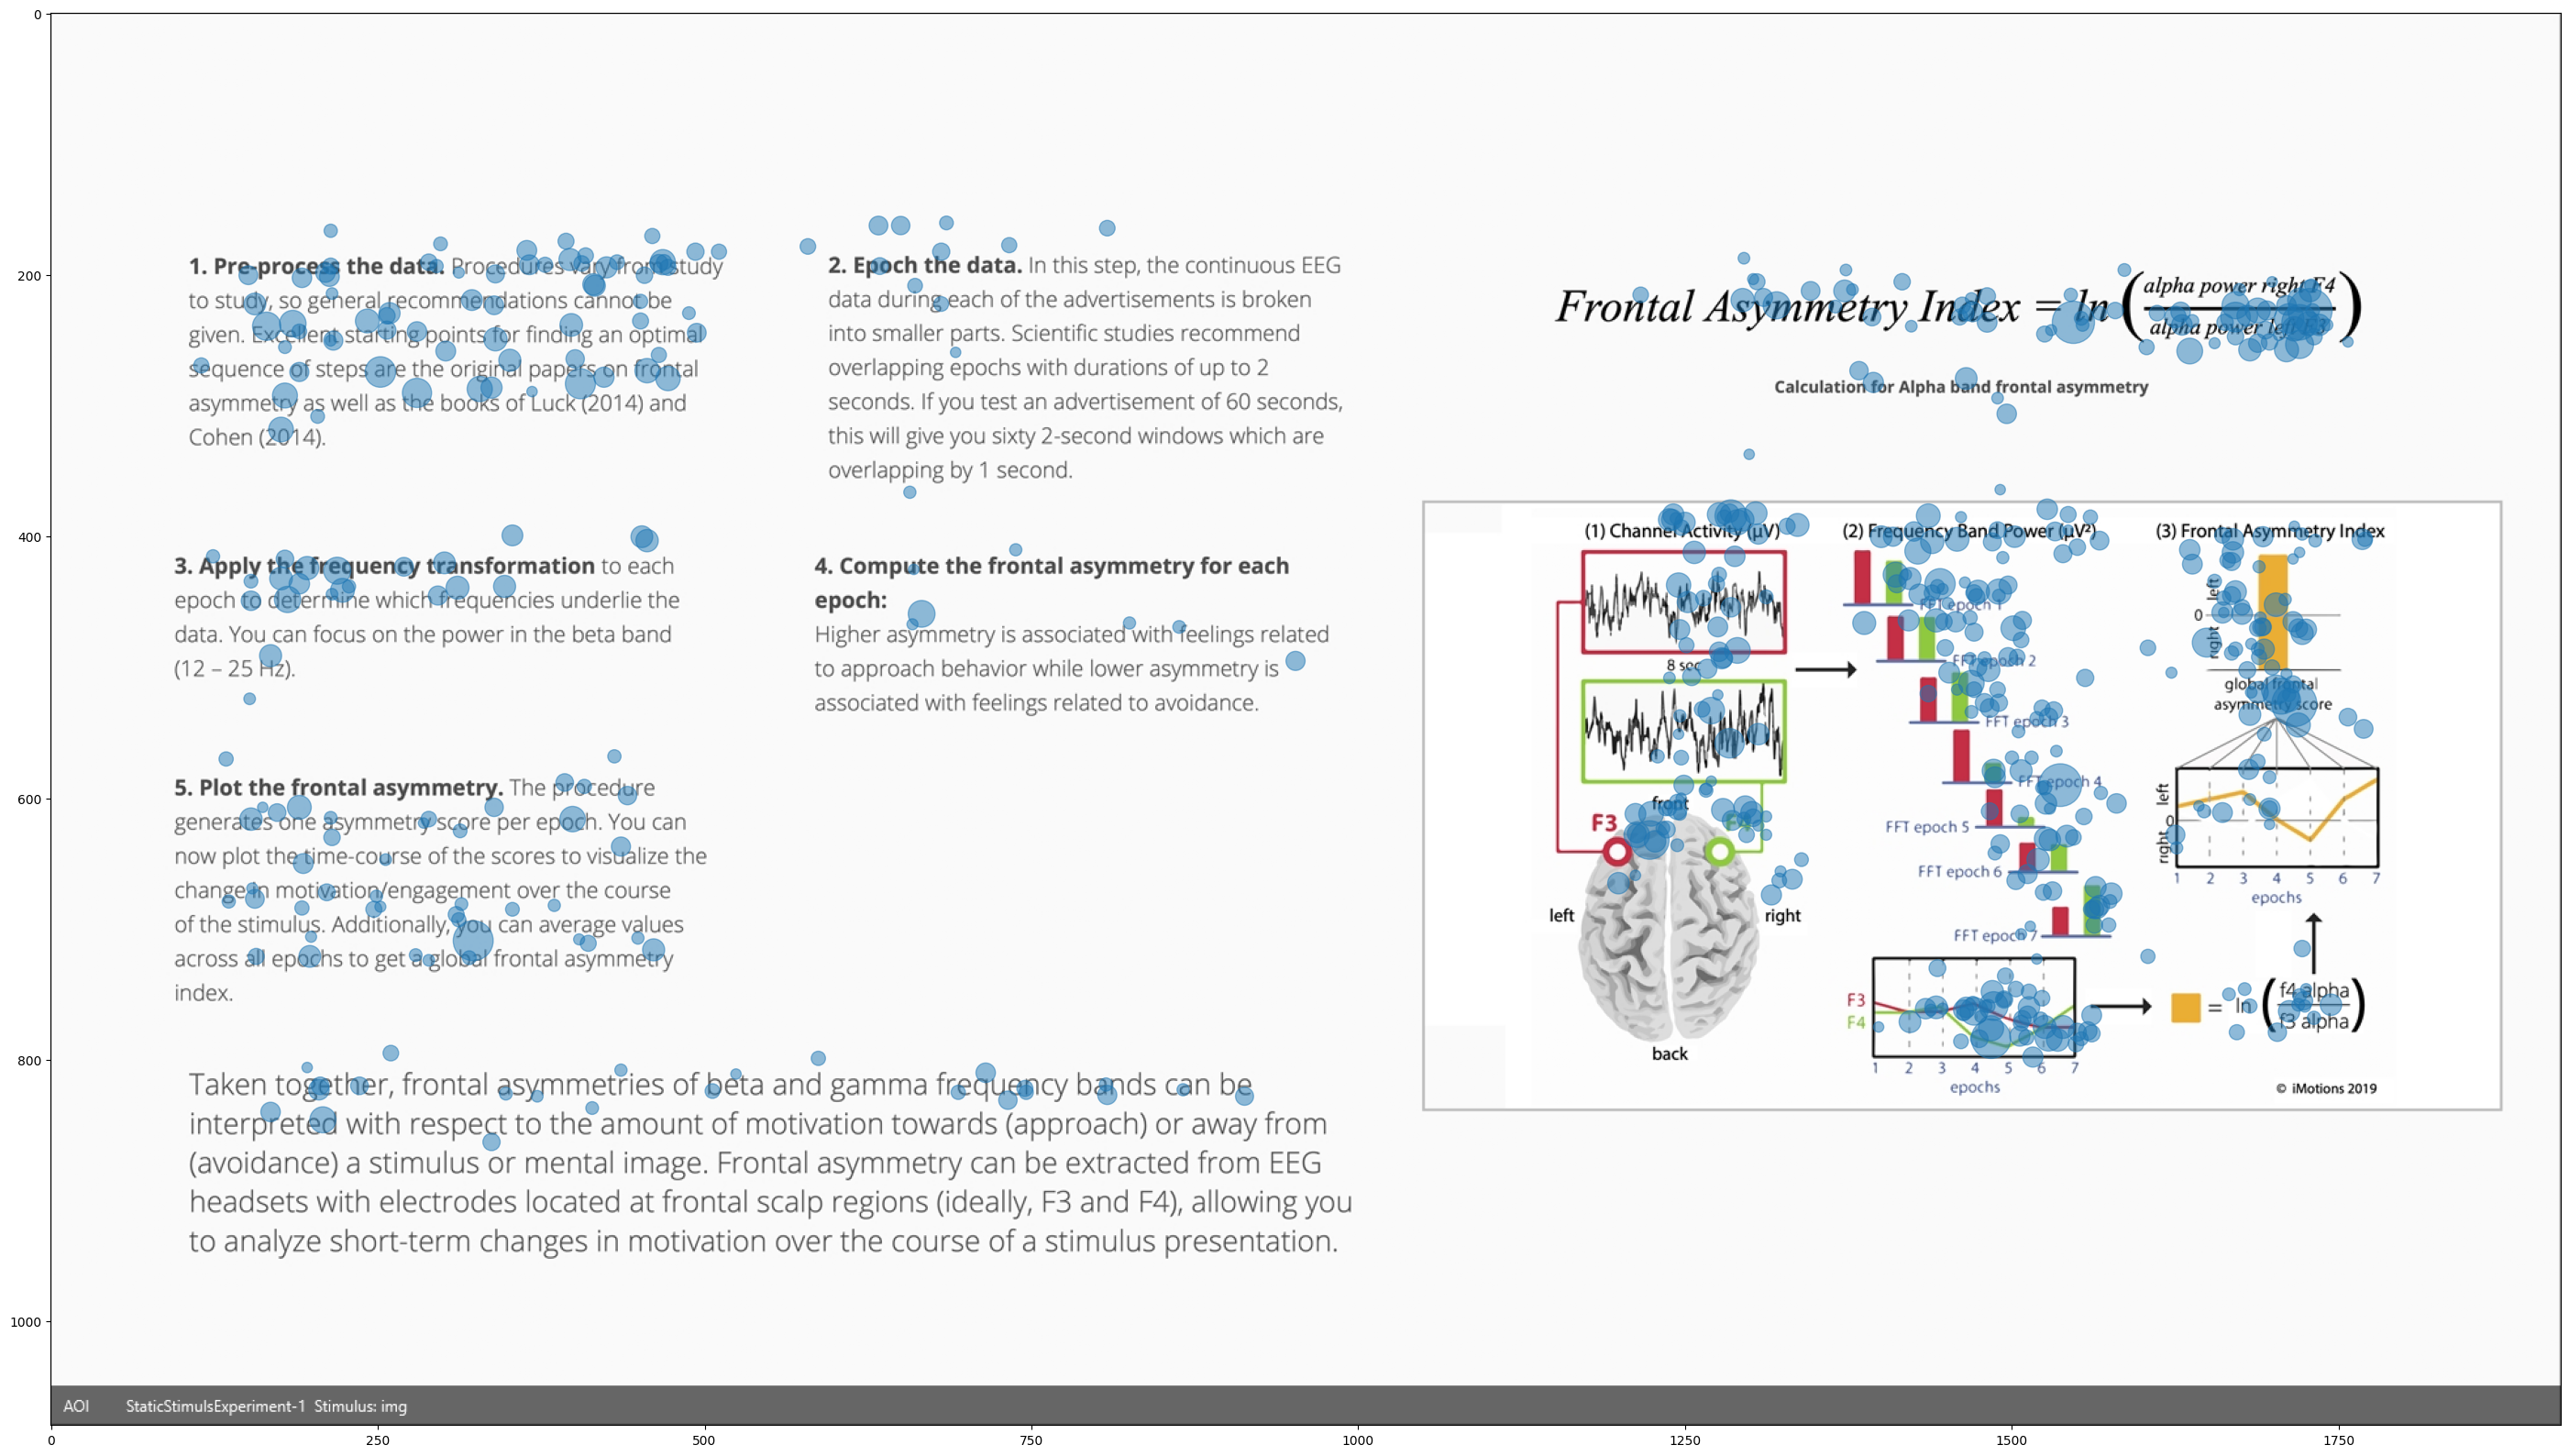

In [198]:
# plot fixations
# set plot dimensions
plt.rcParams['figure.figsize'] = [40, 20]
# initiate plot
fig, ax = plt.subplots()
#invert axses
ax.invert_yaxis()
# plot stimulus as background
img = plt.imread("stimulus.png")
ax.imshow(img)
# plot gazes
ax.scatter(fixationData["Fixation X"], fixationData["Fixation Y"], s= fixationData["Fixation Duration"], alpha=0.5)
# generate a list of random colors

In [199]:
#4. Heatmap

In [200]:
def gaussian(x, sx, y=None, sy=None):
	
	"""Returns an array of numpy arrays (a matrix) containing values between
	1 and 0 in a 2D Gaussian distribution
	
	arguments
	x		-- width in pixels
	sx		-- width standard deviation
	
	keyword argments
	y		-- height in pixels (default = x)
	sy		-- height standard deviation (default = sx)
	
    reference: PyGazeAnalyser https://github.com/esdalmaijer/PyGazeAnalyser/
    """
	
	# square Gaussian if only x values are passed
	if y == None:
		y = x
	if sy == None:
		sy = sx
	# centers	
	xo = x/2
	yo = y/2
	# matrix of zeros
	M = numpy.zeros([y,x],dtype=float)
	# gaussian matrix
	for i in range(x):
		for j in range(y):
			M[j,i] = numpy.exp(-1.0 * (((float(i)-xo)**2/(2*sx*sx)) + ((float(j)-yo)**2/(2*sy*sy)) ) )

	return M

(1280, 2120)


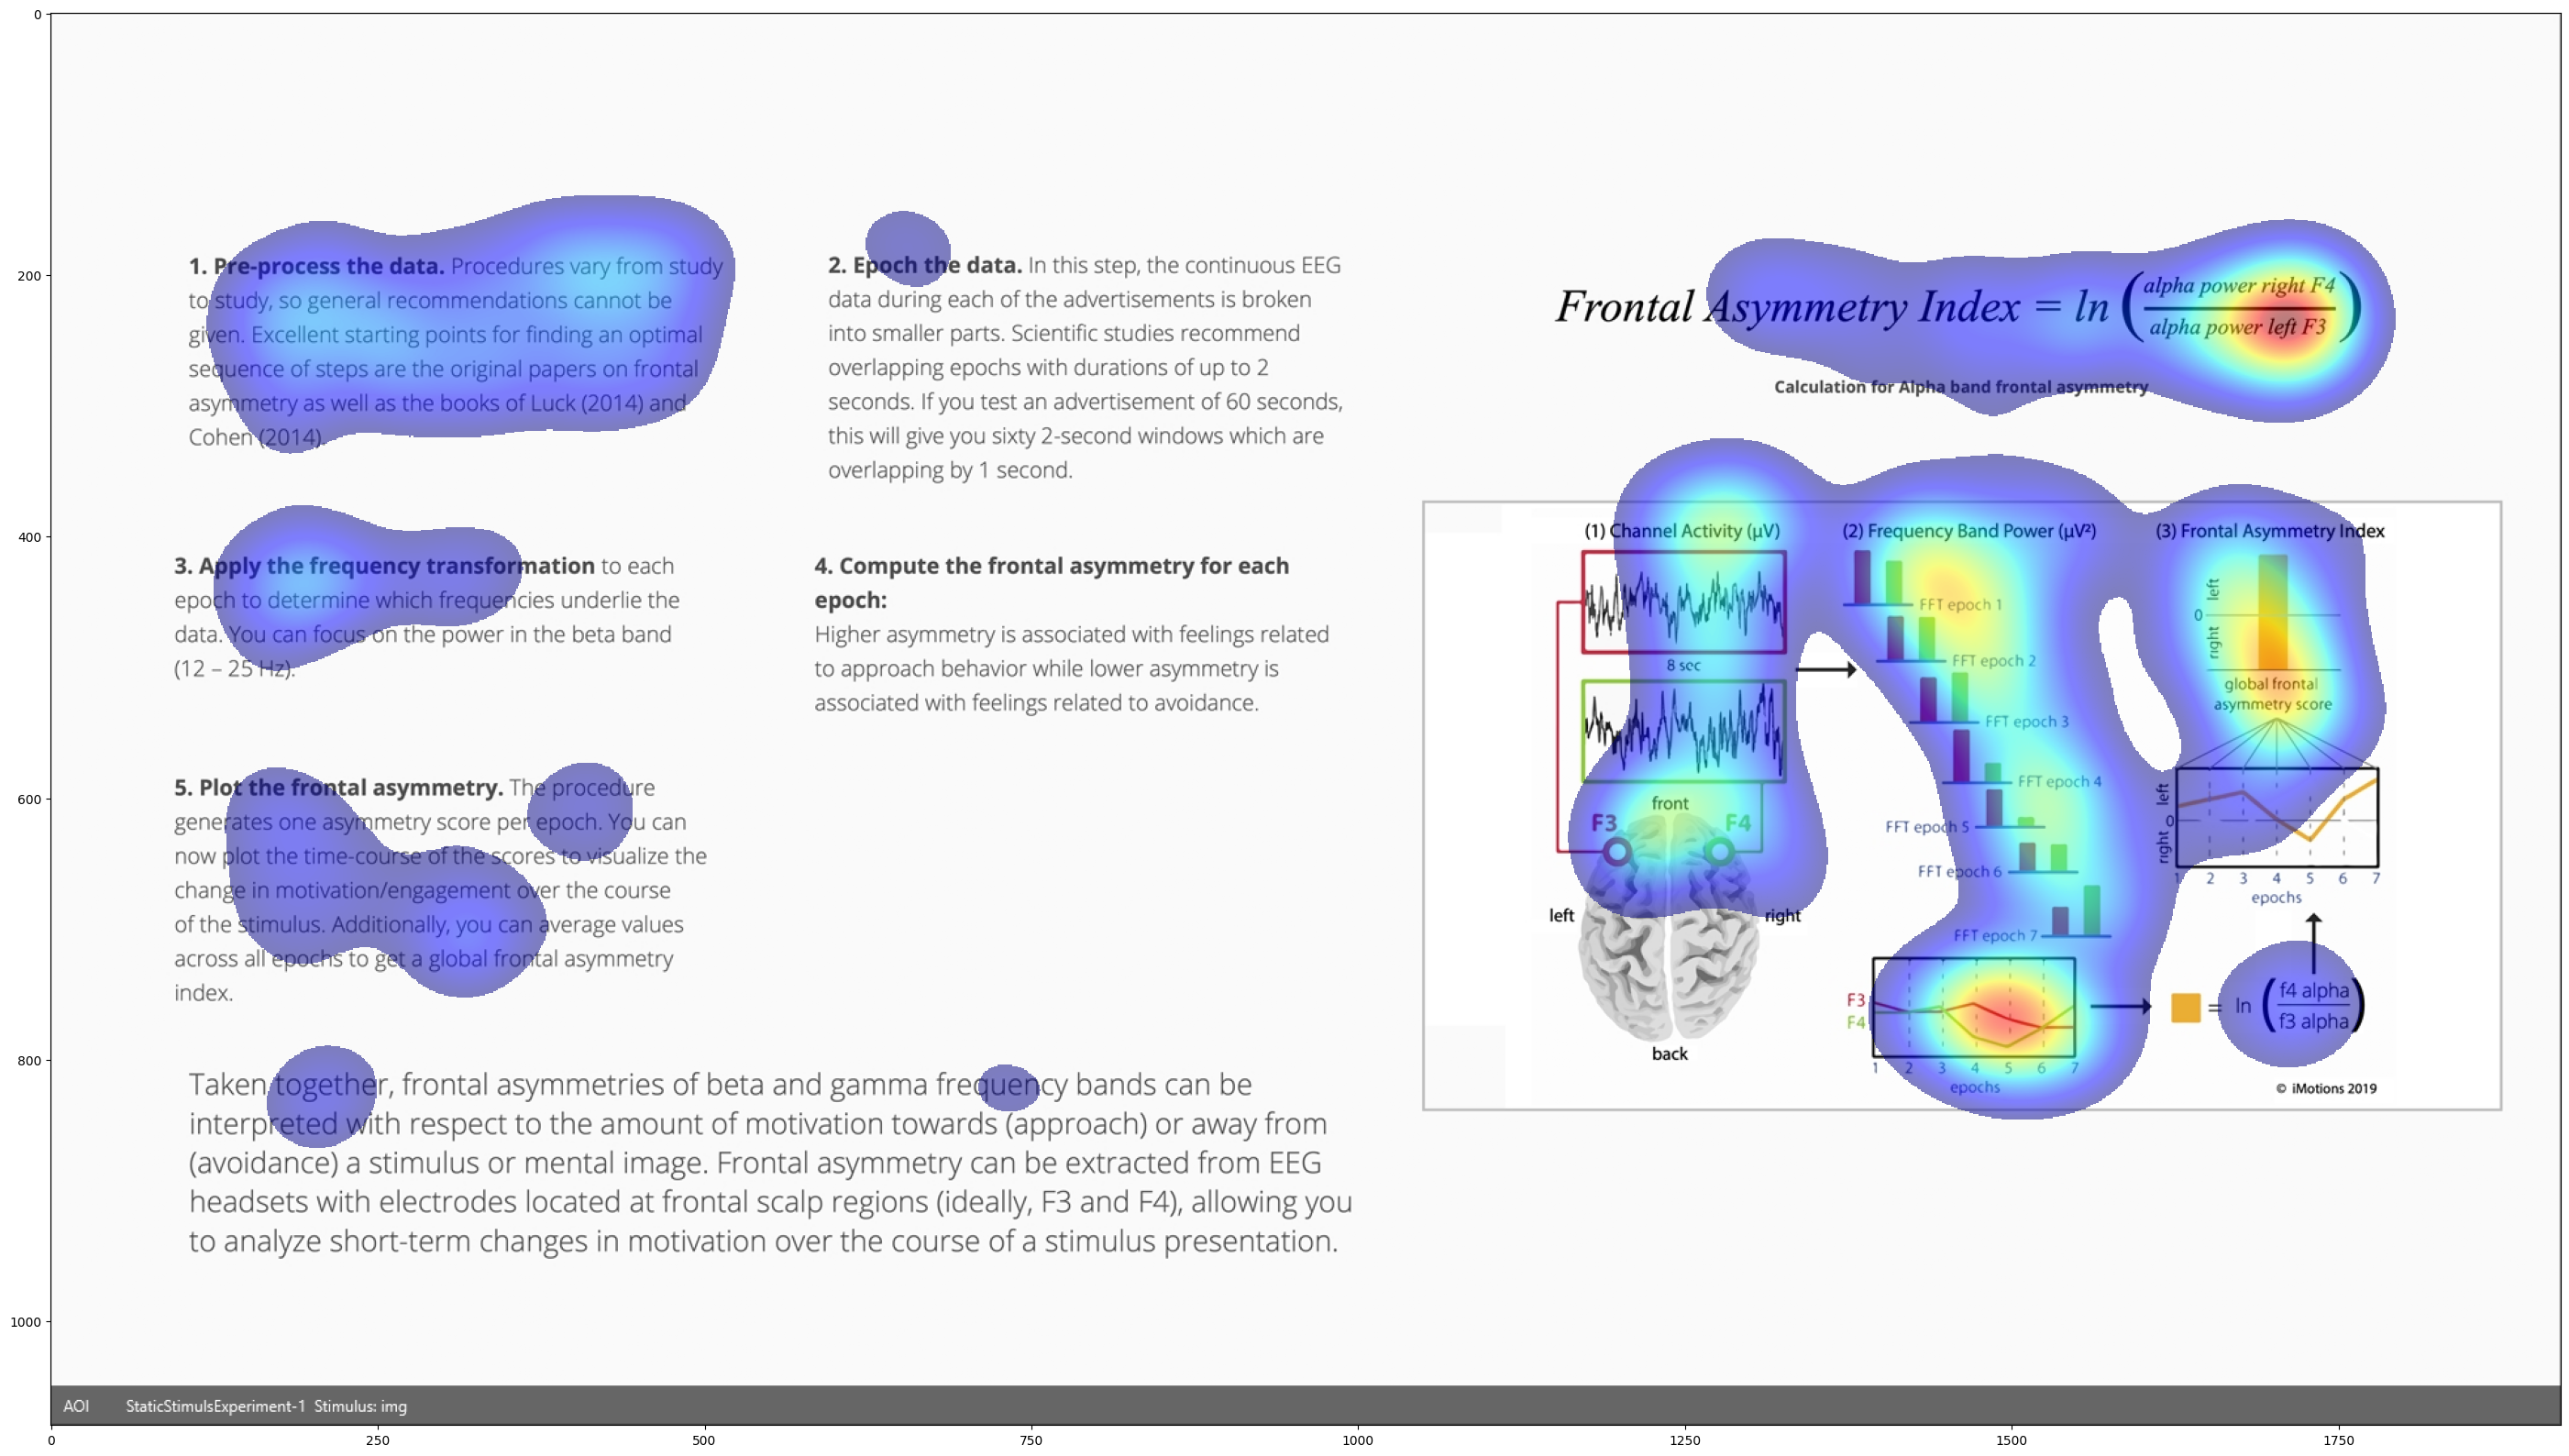

In [201]:
# set plot dimensions
plt.rcParams['figure.figsize'] = [40, 20]
# initiate plot
fig, ax = plt.subplots()
#invert axses
ax.invert_yaxis()
# plot stimulus as background
img = plt.imread("stimulus.png")
ax.imshow(img)

# input
dispsize = (1920,1080)

# Gaussian
gwh = 200
gsdwh = gwh/6
gaus = gaussian(gwh,gsdwh)
# matrix of zeroes
strt = int(gwh/2)
heatmapsize = int(dispsize[1] + 2*strt), int(dispsize[0] + 2*strt)
print(heatmapsize)
heatmap = numpy.zeros(heatmapsize, dtype=float)
# create heatmap 
for index, row in fixationData.iterrows():
    # get x and y coordinates of fixations
    # x and y - indices of heatmap array. must be integers
    x = strt + row['Fixation X'] - int(gwh/2)
    y = strt + row['Fixation Y'] - int(gwh/2)
    # correct Gaussian size if either coordinate falls outside of
    # display boundaries
    if (not 0 < x < dispsize[0]) or (not 0 < y < dispsize[1]):
        hadj=[0,gwh];vadj=[0,gwh]
        if 0 > x:
            hadj[0] = abs(x)
            x = 0
        elif dispsize[0] < x:
            hadj[1] = gwh - int(x-dispsize[0])
        if 0 > y:
            vadj[0] = abs(y)
            y = 0
        elif dispsize[1] < y:
            vadj[1] = gwh - int(y-dispsize[1])
        # add adjusted Gaussian to the current heatmap
        try:
            heatmap[y:y+vadj[1],x:x+hadj[1]] += gaus[vadj[0]:vadj[1],hadj[0]:hadj[1]] * row['Fixation Duration']
        except:
            # fixation was probably outside of display
            pass
    else:				
        # add Gaussian to the current heatmap
        heatmap[y:y+gwh,x:x+gwh] += gaus * row['Fixation Duration']

# resize heatmap
heatmap = heatmap[strt:dispsize[1]+strt,strt:dispsize[0]+strt]
# remove zeros
lowbound = numpy.mean(heatmap[heatmap>0])
heatmap[heatmap<lowbound] = numpy.NaN
# draw heatmap on top of image
ax.imshow(heatmap, cmap='jet', alpha=0.5)




In [202]:
# Scanpath

In [203]:
# COLOURS
# all colours are from the Tango colourmap, see:
# http://tango.freedesktop.org/Tango_Icon_Theme_Guidelines#Color_Palette
COLS = {	"butter": [	'#fce94f',
					'#edd400',
					'#c4a000'],
		"orange": [	'#fcaf3e',
					'#f57900',
					'#ce5c00'],
		"chocolate": [	'#e9b96e',
					'#c17d11',
					'#8f5902'],
		"chameleon": [	'#8ae234',
					'#73d216',
					'#4e9a06'],
		"skyblue": [	'#729fcf',
					'#3465a4',
					'#204a87'],
		"plum": 	[	'#ad7fa8',
					'#75507b',
					'#5c3566'],
		"scarletred":[	'#ef2929',
					'#cc0000',
					'#a40000'],
		"aluminium": [	'#eeeeec',
					'#d3d7cf',
					'#babdb6',
					'#888a85',
					'#555753',
					'#2e3436'],
		}

In [204]:
fixationData.head()

index  FixID Fixation Index by Stimulus  Fixation X  Fixation Y  \
0      1    1.0                                    952         495   
1     53    2.0                                    460         170   
2     79    3.0                                    214         166   
3     94    4.0                                    210         198   
4    127    5.0                                    289         190   

   Fixation Start  Fixation End  Fixation Duration  Fixation Dispersion  
0        133.1086      358.0820           224.9734               0.2948  
1        566.4076      708.1011           141.6935               0.1180  
2        783.0360      891.3651           108.3291               0.1850  
3        908.0385     1141.3419           233.3034               0.2571  
4       1182.9961     1349.6581           166.6620               0.1125

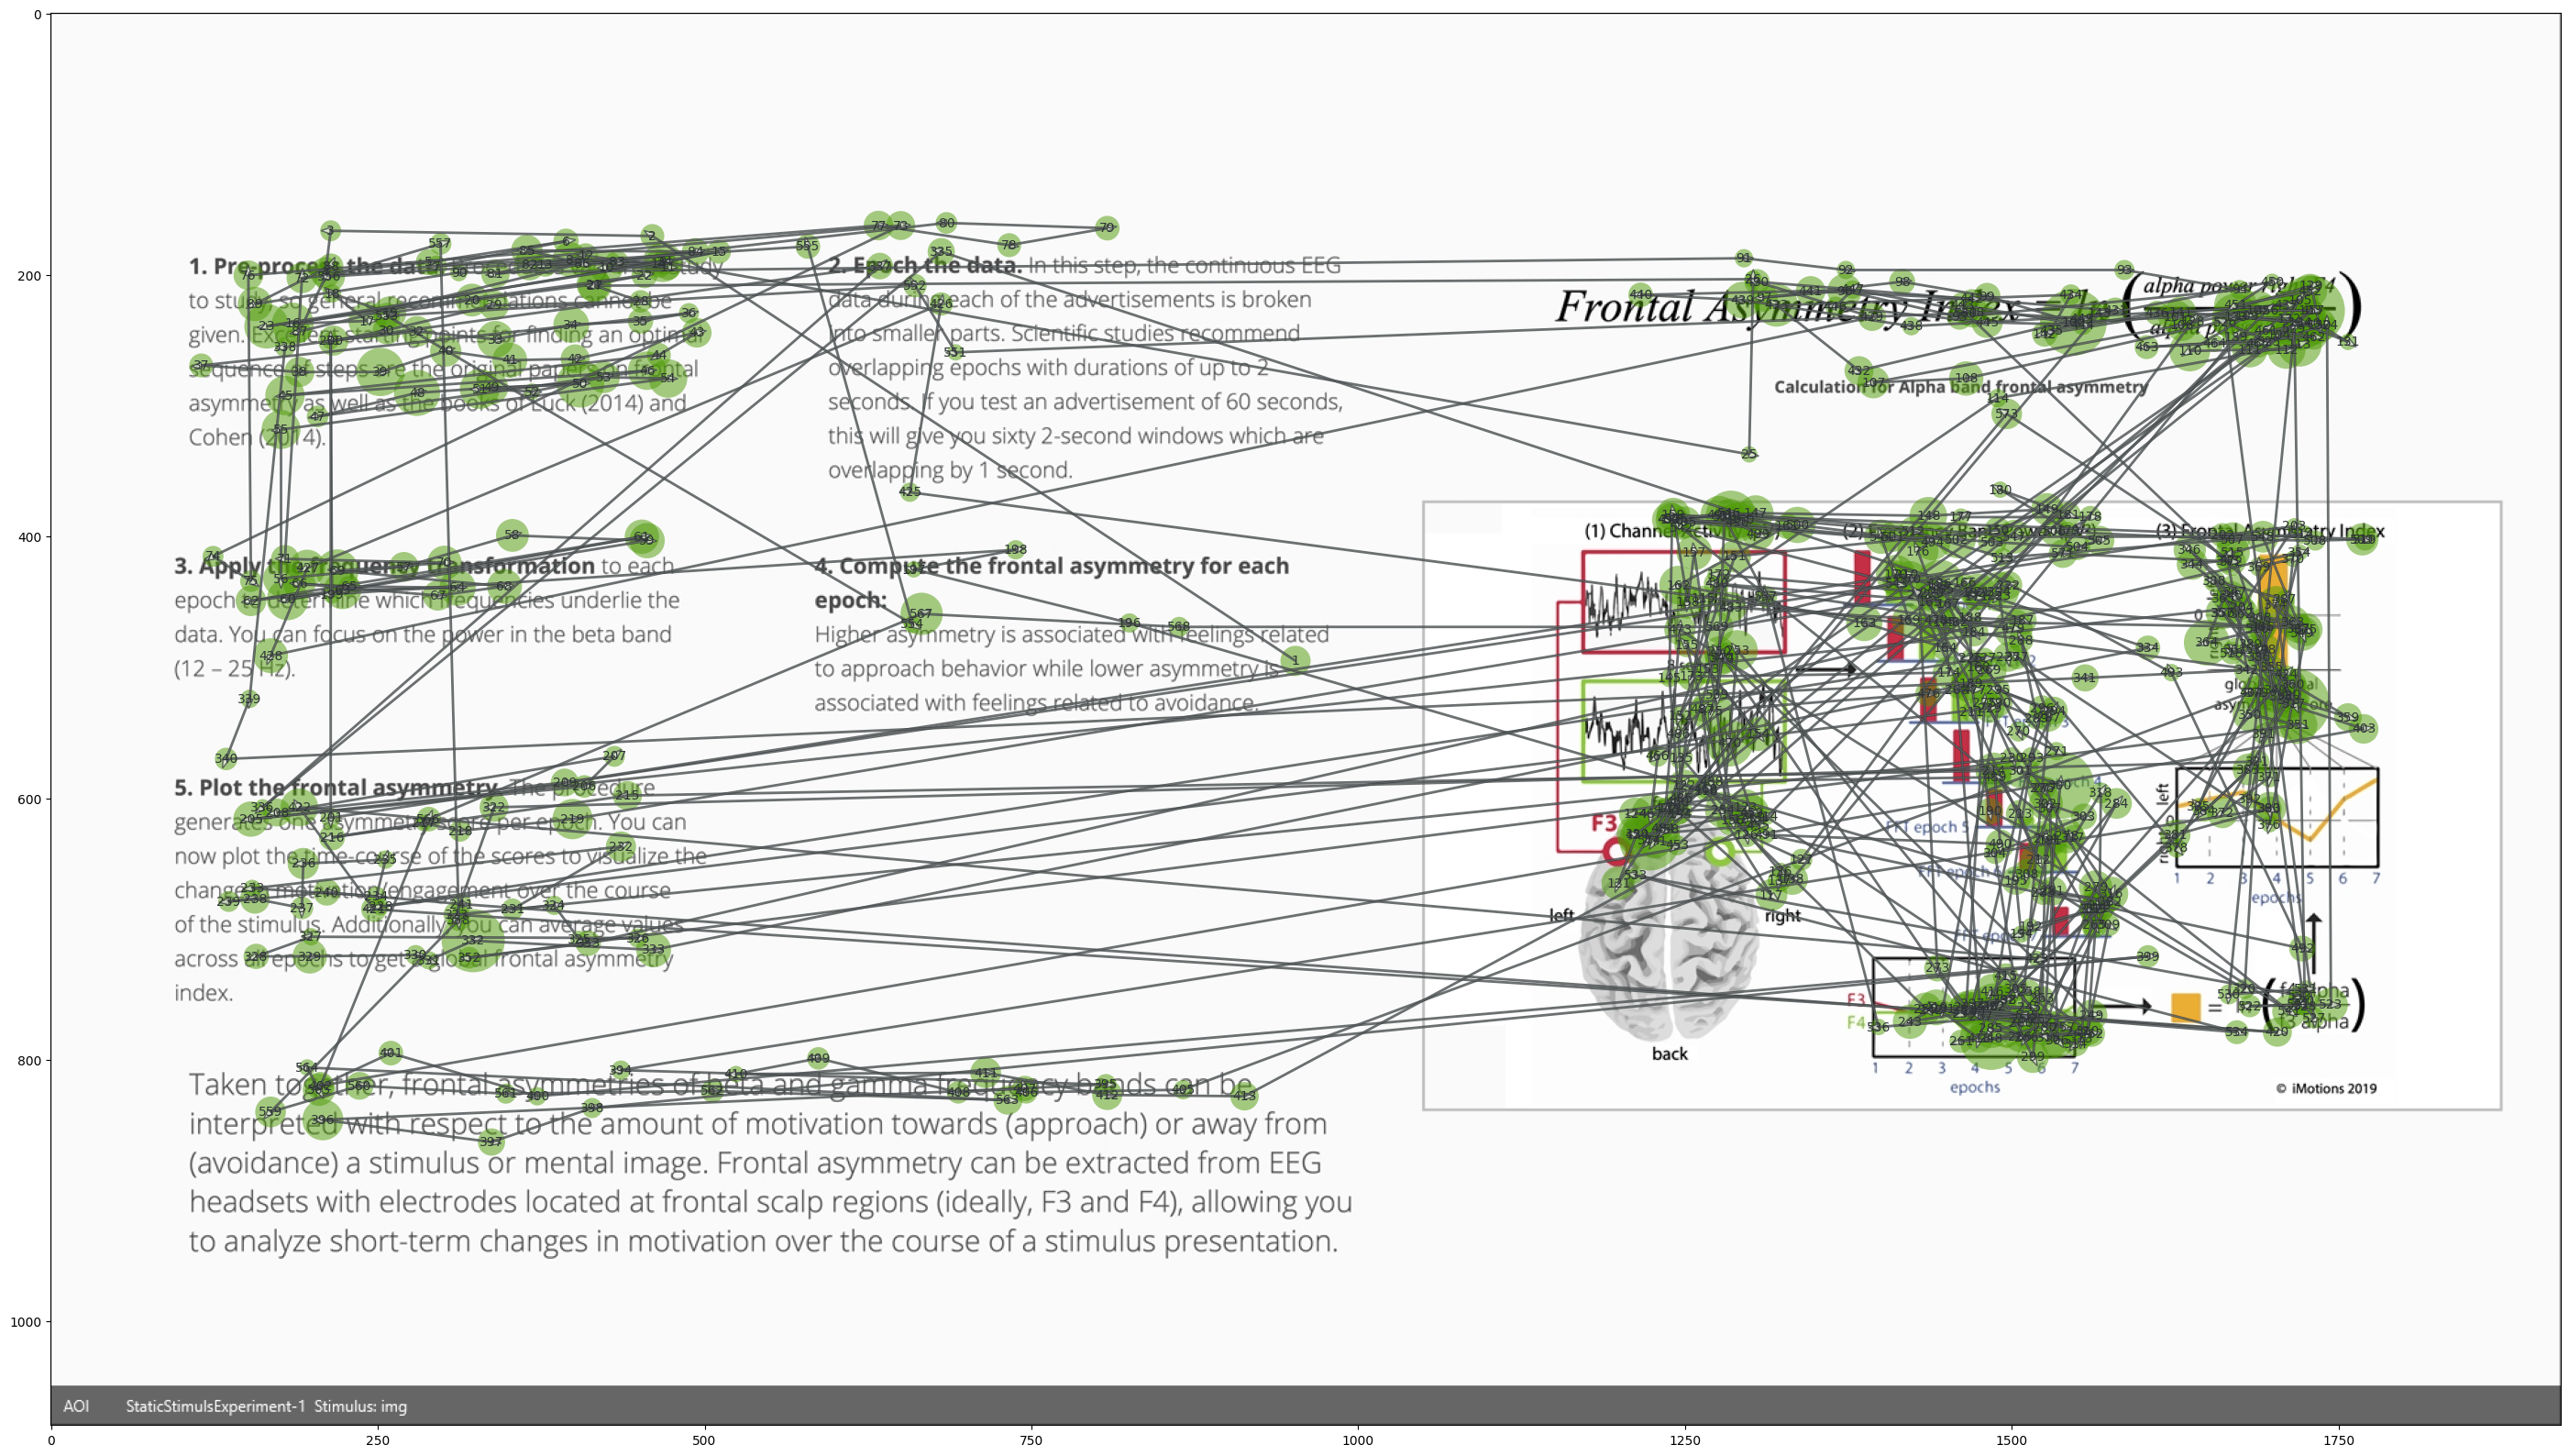

In [212]:
# set plot dimensions
plt.rcParams['figure.figsize'] = [40, 20]
# initiate plot
fig, ax = plt.subplots()
#invert axses
ax.invert_yaxis()
# plot stimulus as background
img = plt.imread("stimulus.png")
ax.imshow(img)

# input
dispsize = (1920,1080)


fixationsDataFrameLength = len(fixationData)


ax.scatter(fixationData['Fixation X'],fixationData['Fixation Y'], s=(2.5 * fixationData['Fixation Duration']), c=COLS['chameleon'][2], marker='o', alpha=0.5, edgecolors='none')

for index, row in fixationData.iterrows():
    ax.annotate(str(index+1), (row['Fixation X'],row['Fixation Y']), color=COLS['aluminium'][5], alpha=1, horizontalalignment='center', verticalalignment='center', multialignment='center')
    if index<fixationsDataFrameLength-1:
        ax.arrow(row['Fixation X'],row['Fixation Y'], fixationData.iloc[index+1]['Fixation X']-row['Fixation X'],fixationData.iloc[index+1]['Fixation Y']-row['Fixation Y'],alpha=.7, fc=COLS['aluminium'][0], ec=COLS['aluminium'][5], fill=True, shape='full', width=1, head_width=5, head_starts_at_zero=False, overhang=0)
